<a href="https://colab.research.google.com/github/Ruymelo10/ProjetoTAGDI/blob/master/Projeto_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* O nosso trabalho utiliza de uma API, a football-data, para retirar 
informações sobre os times e as partidas dos times da Premier League (Liga de futebol inglesa), nas temporadas 2018-2019, 2019-2020 e 2020-2021, para que possamos fazer análises desses times.

Grupo: Rodrigo Albuquerque e Ruy Ovídio

# Coleta de dados

In [229]:
import http.client
import json
import pandas as pd
from pandas import json_normalize
from tabulate import tabulate
#FAZENDO A CONEXÃO COM A API E COLOCANDO OS DADOS NO DATAFRAME
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'c6a7c804a45446b5a641af92ac107535' }
connection.request('GET', '/v2/competitions/PL/matches?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2018 = pd.DataFrame(json_normalize(response['matches']))
data2018['ano'] = 19 #2018-2019
connection.request('GET', '/v2/competitions/PL/matches?season=2019', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2019 = pd.DataFrame(json_normalize(response['matches']))
data2019['ano'] = 20 #2019-2020
connection.request('GET', '/v2/competitions/PL/matches?season=2020', None, headers )
response = json.loads(connection.getresponse().read().decode())
data2020 = pd.DataFrame(json_normalize(response['matches']))
data2020['ano'] = 21 #2020-2021
frames = [data2018,data2019,data2020]
dataMatches = pd.concat(frames) #DATAFRAME COM OS DADOS DAS PARTIDAS
dataMatches['totalGoals'] = dataMatches['score.fullTime.awayTeam'] + dataMatches['score.fullTime.homeTeam']
connection.request('GET', '/v2/competitions/PL/teams?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2018 = pd.DataFrame(json_normalize(response['teams'])) #2018-2019
connection.request('GET', '/v2/competitions/PL/teams?season=2019', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2019 = pd.DataFrame(json_normalize(response['teams'])) #2019-2020
connection.request('GET', '/v2/competitions/PL/teams?season=2020', None, headers )
response = json.loads(connection.getresponse().read().decode())
dataTeams2020 = pd.DataFrame(json_normalize(response['teams'])) #2020-2021
frames = [dataTeams2018,dataTeams2019,dataTeams2020]
dataTeams = pd.concat(frames) #DATAFRAME COM OS DADOS DAS EQUIPES
dataTeams.drop_duplicates(subset ='id',keep = 'first', inplace = True)
print(tabulate(dataMatches.head(), headers='keys', tablefmt='psql')) #IMPRIMINDO O HEAD DO DATAFRAME DE PARTIDAS, COM UMA FORMATAÇÃO PARA MELHOR ANÁLISE
print(tabulate(dataTeams.head(), headers='keys', tablefmt='psql')) #IMPRIMINDO O HEAD DO DATAFRAME DE TIMES, COM UMA FORMATAÇÃO PARA MELHOR ANÁLISE

+----+--------+----------------------+----------+------------+----------------+----------------+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------------+------------------+--------------------------+-------------------------------------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+----------------------------+----------------------------+----------------------------+----------------------------+---------------+-----------------------+---------------+---------------------------+-------+--------------+
|    |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          | referee

* Criamos um Crawler para pegar informações de Overall (Média da força dos jogadores) de cada time no jogo FIFA, dos anos referentes aos dados que conseguimos na API, visto que, como os dados do jogo simulam a realidade, podem servir como referência para verificarmos quais times são mais fortes ou mais fracos

In [230]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
#Config do crawler
from bs4 import BeautifulSoup
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [231]:
#crawler
names = []
overalls = []
yearList = []
years = [19,20,21]
for year in years:
  url = "https://www.fifaindex.com/pt-br/teams/fifa" + str(year) + "/?league=13&order=desc"
  driver.get(url)
  content = driver.page_source
  soup = BeautifulSoup(content)
  table = soup.find('table', attrs={'class':'table table-striped table-teams'})
  for a in table.findAll('tr'):
    time = a
    nomeTd = time.find('td', attrs={'data-title':'Nome'})
    if nomeTd != None:
      nome = nomeTd.find('a').text
    overallTd = time.find('td', attrs={'data-title':'GER'})
    if overallTd != None:
      overall = overallTd.find('span').text
    names.append(nome)
    overalls.append(overall)
    yearList.append(year)
overallsDf = pd.DataFrame({'name': names, 'overall': overalls, 'year': yearList})
overallsDf.drop_duplicates(keep='first',inplace=True)
teamId = (overallsDf.name
          .apply(lambda x: dataTeams[dataTeams.name.str.contains(x)]['id'])
          .bfill(axis=1)
          .iloc[:, 0])
overallsDf = pd.concat([overallsDf, teamId], axis=1)
overallsDf.columns = ['name','overall','year','teamId']
overallsDf.drop(columns='name', inplace=True)
dataMatches = pd.merge(dataMatches, overallsDf,left_on=['homeTeam.id','ano'],right_on=['teamId','year'], how='outer')
dataMatches.drop(columns={'teamId','year'}, inplace=True)
dataMatches.rename(columns={'overall': 'homeTeamOverall'}, inplace=True)
dataMatches = pd.merge(dataMatches, overallsDf,left_on=['awayTeam.id','ano'],right_on=['teamId','year'], how='outer')
dataMatches.drop(columns={'teamId','year'}, inplace=True)
dataMatches.rename(columns={'overall': 'awayTeamOverall'}, inplace=True)

In [232]:
#Colocando o overall Medio de cada time no fifa dentro do dataframe de times
overallsDf['overall'] = overallsDf['overall'].astype('int64')
overMedio = overallsDf.groupby('teamId')['overall'].mean()
dataTeams = pd.merge(dataTeams, overMedio,left_on=['id'],right_on=['teamId'], how='outer')

# Pré-processamento dos dados

* Tirando algumas informações do DataMatches por não serem usadas no projeto



In [233]:
dataMatches.drop(columns=['score.extraTime.homeTeam','score.extraTime.awayTeam','score.penalties.homeTeam','score.penalties.awayTeam','referees','odds.msg'], inplace=True)

* Removendo partidas que ainda não ocorreram e informações sujas, ou seja, com NA (Limpeza de dados)



In [234]:
dataMatches.drop(dataMatches[(dataMatches['status'] == 'SCHEDULED') | (dataMatches['status'] == 'POSTPONED')].index, inplace=True)
dataMatches.dropna(thresh=6, inplace=True) #Usando threshold de 6, visto que existem 4 parâmetros que sempre são vazios, já que não existe prorrogação nem disputa de penaltis na premier league

* Verificando os tipos do dataframe dataMatches e fazendo algumas alterações de tipo



In [235]:
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam    float64
score.fullTime.awayTeam    float64
score.halfTime.homeTeam    float64
score.halfTime.awayTeam    float64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                        float64
totalGoals                 float64
homeTeamOverall             object
awayTeamOverall             object
dtype: object

In [236]:
#totalGoals e ano não devem ser float, pois a quantidade de gols de uma partida é um número inteiro e o ano também
#Além disso, os scores também devem ser números inteiros, visto que não conseguimos fazer 0.5 gols, por exemplo
dataMatches['totalGoals'] = dataMatches['totalGoals'].astype('int64')
dataMatches['ano'] = dataMatches['ano'].astype('int64')
dataMatches['score.halfTime.awayTeam'] = dataMatches['score.halfTime.awayTeam'].astype('int64')
dataMatches['score.halfTime.homeTeam'] = dataMatches['score.halfTime.homeTeam'].astype('int64')
dataMatches['score.fullTime.awayTeam'] = dataMatches['score.fullTime.awayTeam'].astype('int64')
dataMatches['score.fullTime.homeTeam'] = dataMatches['score.fullTime.homeTeam'].astype('int64')
dataMatches['homeTeamOverall'] = dataMatches['homeTeamOverall'].astype('int64')
dataMatches['awayTeamOverall'] = dataMatches['awayTeamOverall'].astype('int64')
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam      int64
score.fullTime.awayTeam      int64
score.halfTime.homeTeam      int64
score.halfTime.awayTeam      int64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                          int64
totalGoals                   int64
homeTeamOverall              int64
awayTeamOverall              int64
dtype: object

* Utilizando método de Tukey para identificar outliers univariados baseado no atributo de gols totais

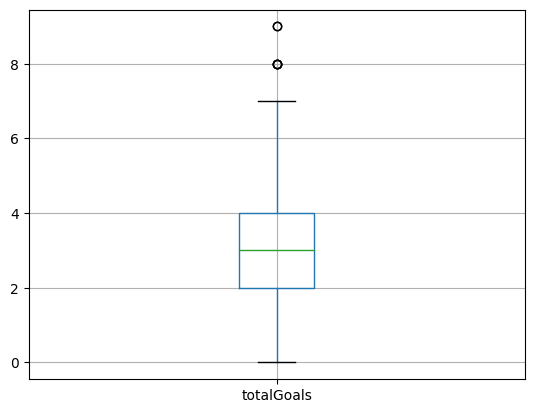

In [237]:
dataMatches.boxplot(column=['totalGoals']) #Verificando simetria com boxplot

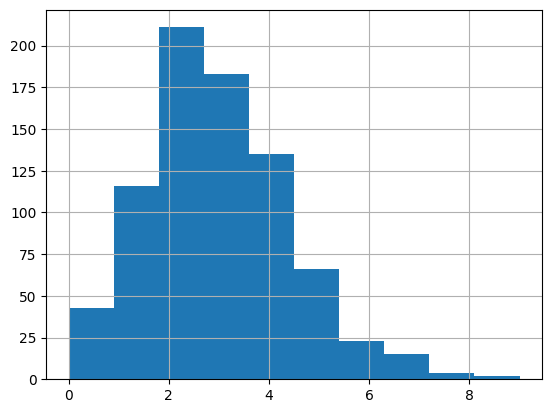

In [238]:
dataMatches['totalGoals'].hist() #Confirmando simetria com histograma, não é simétrico

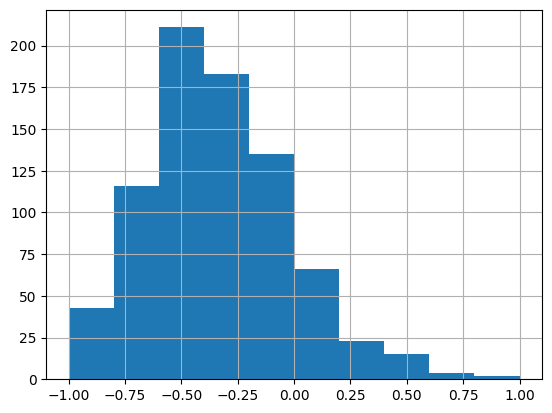

In [239]:
#Normalizando a quantidade de gols por partida por min max entre -1 e 1
dataMatches['totalGoalsMinMax'] = ((dataMatches['totalGoals'] - dataMatches['totalGoals'].min()) / (dataMatches['totalGoals'].max() - dataMatches['totalGoals'].min())*2) -1
dataMatches['totalGoalsMinMax'].hist()

In [240]:
#Dividindo os quartis de total de gols
q1 = dataMatches['totalGoalsMinMax'].quantile(q=0.25)
q3 = dataMatches['totalGoalsMinMax'].quantile(q=0.75)
intervaloInterQuartil = q3 - q1

In [241]:
#Verificando os outliers
print(tabulate(dataMatches[(dataMatches['totalGoalsMinMax'] < (q1-1.5*intervaloInterQuartil))], headers='keys', tablefmt='psql')) # Outliers menores que q1 - 1.5 * intervaloInterQuartil
print(tabulate(dataMatches[(dataMatches['totalGoalsMinMax'] > (q3+1.5*intervaloInterQuartil))], headers='keys', tablefmt='psql')) # Outliers maiores que q3 + 1.5 * intervaloInterQuartil

+------+-----------+----------+------------+---------+---------+---------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+-----------------+---------------+-----------------+-------+--------------+-------------------+-------------------+--------------------+
| id   | utcDate   | status   | matchday   | stage   | group   | lastUpdated   | season.id   | season.startDate   | season.endDate   | season.currentMatchday   | score.winner   | score.duration   | score.fullTime.homeTeam   | score.fullTime.awayTeam   | score.halfTime.homeTeam   | score.halfTime.awayTeam   | homeTeam.id   | homeTeam.name   | awayTeam.id   | awayTeam.name   | ano   | totalGoals   | homeTeamOverall   | awayTeamOverall   | totalGoalsMinMax   |
|------+-----------+----------+------------+---------+---------+------------

* Após a verificação dos dados em sites especializados, verificou-se que todos os jogos dados como outliers estavam corretos, logo não foi excluído nenhum jogo
* Para fazer a detecção de outliers multivariados, usaremos a técnica Elliptic Envelope

In [242]:
#Verificando os tipos dos dados
dataMatches.dtypes

id                         float64
utcDate                     object
status                      object
matchday                   float64
stage                       object
group                       object
lastUpdated                 object
season.id                  float64
season.startDate            object
season.endDate              object
season.currentMatchday     float64
score.winner                object
score.duration              object
score.fullTime.homeTeam      int64
score.fullTime.awayTeam      int64
score.halfTime.homeTeam      int64
score.halfTime.awayTeam      int64
homeTeam.id                float64
homeTeam.name               object
awayTeam.id                float64
awayTeam.name               object
ano                          int64
totalGoals                   int64
homeTeamOverall              int64
awayTeamOverall              int64
totalGoalsMinMax           float64
dtype: object

In [243]:
#Transformando dados que eram objetos em categóricos, criando códigos para as categorias e guardando em um dataFrame separado, caso exista algum erro, removeremos do dataframe original via ID da partida
dataMatches2 = dataMatches.copy()
dataMatches2['utcDate'] = dataMatches2['utcDate'].astype('category')
dataMatches2['status'] = dataMatches2['status'].astype('category')
dataMatches2['stage'] = dataMatches2['stage'].astype('category')
dataMatches2['lastUpdated'] = dataMatches2['lastUpdated'].astype('category')
dataMatches2['group'] = dataMatches2['group'].astype('category')
dataMatches2['season.startDate'] = dataMatches2['season.startDate'].astype('category')
dataMatches2['season.endDate'] = dataMatches2['season.endDate'].astype('category')
dataMatches2['score.winner'] = dataMatches2['score.winner'].astype('category')
dataMatches2['score.duration'] = dataMatches2['score.duration'].astype('category')
dataMatches2['homeTeam.name'] = dataMatches2['homeTeam.name'].astype('category')
dataMatches2['awayTeam.name'] = dataMatches2['awayTeam.name'].astype('category')
dataMatches2['utcDate'] = dataMatches2['utcDate'].cat.codes
dataMatches2['status'] = dataMatches2['status'].cat.codes
dataMatches2['stage'] = dataMatches2['stage'].cat.codes
dataMatches2['lastUpdated'] = dataMatches2['lastUpdated'].cat.codes
dataMatches2['group'] = dataMatches2['group'].cat.codes
dataMatches2['season.startDate'] = dataMatches2['season.startDate'].cat.codes
dataMatches2['season.endDate'] = dataMatches2['season.endDate'].cat.codes
dataMatches2['score.winner'] = dataMatches2['score.winner'].cat.codes
dataMatches2['score.duration'] = dataMatches2['score.duration'].cat.codes
dataMatches2['homeTeam.name'] = dataMatches2['homeTeam.name'].cat.codes
dataMatches2['awayTeam.name'] = dataMatches2['awayTeam.name'].cat.codes
print(tabulate(dataMatches.head(), headers='keys', tablefmt='psql'))

+----+--------+----------------------+----------+------------+----------------+----------------+----------------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+-----------------------+---------------+-------------------+-------+--------------+-------------------+-------------------+--------------------+
|    |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          |   season.id | season.startDate   | season.endDate   |   season.currentMatchday | score.winner   | score.duration   |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id | homeTeam.name         |   awayTeam.id | awayTeam.name     |   ano |   totalGoals |   homeTeamOverall |   awayTeamOverall |   t

In [244]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01) #Considerando que 1% são outliers
detector.fit(dataMatches2)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
                 store_precision=True, support_fraction=None)

In [245]:
scores = detector.predict(dataMatches2) 
dataMatches['outlier'] = scores # Se for -1 é outlier, colocando os outliers direto no dataMatches, já que dataMatches e dataMatches2 tem o mesmo tamanho
print(tabulate(dataMatches[dataMatches['outlier'] == -1], headers='keys', tablefmt='psql'))

+------+--------+----------------------+----------+------------+----------------+----------------+----------------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+---------------------------+---------------+----------------------------+-------+--------------+-------------------+-------------------+--------------------+-----------+
|      |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          |   season.id | season.startDate   | season.endDate   |   season.currentMatchday | score.winner   | score.duration   |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id | homeTeam.name             |   awayTeam.id | awayTeam.name              |   ano |   totalGoals |  

* Após a verificação dos jogos em sites especializados, foi visto que todas as informações relativas aos jogos estavam corretas, logo nenhuma linha do dataFrame foi removida.

* Nas células abaixo, utilizaremos as informações do dataframe de partidas (dataMatches), para extrair algumas informações sobre os times e colocar no dataframe de times (dataTeams)

# Populando o dataframe de Times / Continuando o pré processamento

In [246]:
#Pegando o total de jogos e colocando no dataframe de times
homeGames = dataMatches[dataMatches.status == 'FINISHED'].groupby(['homeTeam.id'])['id'].count()
awayGames = dataMatches[dataMatches.status == 'FINISHED'].groupby(['awayTeam.id'])['id'].count()
totalGames = homeGames.add(awayGames)
totalGames = totalGames.to_frame(name='totalGames')
dataTeams = pd.merge(dataTeams, totalGames, left_on='id', right_on='homeTeam.id', how='outer')

In [247]:
#Pegando o total de vitórias de cada time e colocando no dataframe de times
winsHome = dataMatches[dataMatches['score.winner'] == 'HOME_TEAM'].groupby(['homeTeam.id'])['id'].count()
wins = winsHome.to_frame(name='homeWins')
wins['awayWins'] = dataMatches[dataMatches['score.winner'] == 'AWAY_TEAM'].groupby(['awayTeam.id'])['id'].count()
wins['totalWins'] = wins['awayWins'] + wins['homeWins']
dataTeams = pd.merge(dataTeams, wins, left_on='id', right_on='homeTeam.id', how='outer')

In [248]:
#Pegando o total de derrotas, caso a quantidade seja NAN, substituir por 0
awayDefeats = dataMatches[dataMatches['score.winner'] == 'HOME_TEAM'].groupby(['awayTeam.id'])['id'].count()
defeats = awayDefeats.to_frame(name='awayDefeats')
defeats['homeDefeats'] = dataMatches[dataMatches['score.winner'] == 'AWAY_TEAM'].groupby(['homeTeam.id'])['id'].count()
defeats = defeats.fillna(0)#Tratando derrotas ausentes, colocando 0 pois se tratam de times recém-promovidos
defeats['totalDefeats'] = defeats['homeDefeats'] + defeats['awayDefeats']
dataTeams = pd.merge(dataTeams, defeats, left_on='id', right_on='awayTeam.id', how='outer')

In [249]:
#Pegando o total de empates e colocando no dataframe de times
homeDraws = dataMatches[dataMatches['score.winner'] == 'DRAW'].groupby(['homeTeam.id'])['id'].count()
draws = homeDraws.to_frame(name='homeDraws')
draws['awayDraws'] = dataMatches[dataMatches['score.winner'] == 'DRAW'].groupby(['awayTeam.id'])['id'].count()
draws = draws.fillna(0)#Tratando empates ausentes, colocando 0 pois se tratam de times recém-promovidos (Tratamento de dados ausentes)
draws['totalDraws'] = draws['homeDraws'] + draws['awayDraws']
dataTeams = pd.merge(dataTeams, draws, left_on='id', right_on='homeTeam.id', how='outer')

In [250]:
#Pegando o total de gols em casa, fora, no primeiro tempo e no segundo tempo e colocando no dataframe de times
homeGoals = dataMatches.groupby(['homeTeam.id'])['score.fullTime.homeTeam'].sum()
goals = homeGoals.to_frame(name='homeGoals')
goals['awayGoals'] = dataMatches.groupby(['awayTeam.id'])['score.fullTime.awayTeam'].sum()
goals['totalGoals'] = goals['homeGoals'] + goals['awayGoals']
goals['awayHalfTimeGoals'] = dataMatches.groupby(['awayTeam.id'])['score.halfTime.awayTeam'].sum()
goals['homeHalfTimeGoals'] = dataMatches.groupby(['homeTeam.id'])['score.halfTime.homeTeam'].sum()
dataTeams = pd.merge(dataTeams, goals, left_on='id', right_on='homeTeam.id', how='outer')

In [251]:
#Pegando a quantidade de gols concedidos e colocando no dataframe de times
homeGoalsConceded = dataMatches.groupby(['homeTeam.id'])['score.fullTime.awayTeam'].sum()
goalsConceded = homeGoalsConceded.to_frame(name='homeGoalsConceded')
goalsConceded['awayGoalsConceded'] = dataMatches.groupby(['awayTeam.id'])['score.fullTime.homeTeam'].sum()
goalsConceded['totalGoalsConceded'] = goalsConceded['homeGoalsConceded'] + goalsConceded['awayGoalsConceded']
goalsConceded['awayHalfTimeGoalsConceded'] = dataMatches.groupby(['awayTeam.id'])['score.halfTime.homeTeam'].sum()
goalsConceded['homeHalfTimeGoalsConceded'] = dataMatches.groupby(['homeTeam.id'])['score.halfTime.awayTeam'].sum()
dataTeams = pd.merge(dataTeams, goalsConceded, left_on='id', right_on='homeTeam.id', how='outer')

In [252]:
#Corrigindo os dados (Tratamento de dados ausentes / Limpando os dados)
dataTeams.loc[(dataTeams['id'] == 356),'founded'] = 1889 #Sheffield é do ano 1889
dataTeams = dataTeams.fillna(0) #Alguns times ainda nao venceram/empataram na PL pois são recém-promovidos
dataTeams = dataTeams.drop(columns=['crestUrl','address','phone','email','lastUpdated','area.id','area.name']) #Tirando dados que não iremos usar

In [253]:
#Pegando os pontos por jogo de cada time e imprimindo a tabela de times
dataTeams = dataTeams.fillna(0) #Alguns times ainda nao venceram/empataram na PL pois são recém-promovidos (inputação)
dataTeams['pointsPerGame'] = ((dataTeams['totalWins']*3) + dataTeams['totalDraws'])/dataTeams['totalGames']
dataTeams.sort_values(by=['pointsPerGame', 'totalGoals'], inplace=True, ascending=False)

* Discretizando a quantidade de partidas, dividindo em 3 partes os times, de forma a saber quais times participaram de mais temporadas da Premier League entre os times que participaram nesses 3 anos

In [254]:
dataTeams['seasonsAppearences'] = pd.cut(dataTeams['totalGames'],3)
print(tabulate(dataTeams, headers='keys', tablefmt='psql')) #IMPRIMINDO O DATAFRAME DE TIMES

+----+------+----------------------------+----------------+-------+------------------------------------+-----------+---------------------+----------------------------------------+-----------+--------------+------------+------------+-------------+---------------+---------------+----------------+-------------+-------------+--------------+-------------+-------------+--------------+---------------------+---------------------+---------------------+---------------------+----------------------+-----------------------------+-----------------------------+-----------------+----------------------+
|    |   id | name                       | shortName      | tla   | website                            |   founded | clubColors          | venue                                  |   overall |   totalGames |   homeWins |   awayWins |   totalWins |   awayDefeats |   homeDefeats |   totalDefeats |   homeDraws |   awayDraws |   totalDraws |   homeGoals |   awayGoals |   totalGoals |   awayHalfTimeGoals |   

# Análise descritiva dos dados
Na inglaterra existe uma elite do futebol que se chama Big 6, que são os 6 principais e mais tradicionais times da liga. Os times que pertecem ao Big 6 são Arsenal, Chelsea, Tottenham, Manchester United, Manchester City e Liverpool. Porém, nos últimos anos, observamos uma dominância grande de dois destes clubes, o Manchester City e o Liverpool. Nosso objetivo, então, é fazer uma analis dos dados das 3 temporaadas mais recentes e destacar estes dois clubes perante a liga, e também fazer uma comparação entre eles.

In [255]:
#Importando as bibliotecas matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns



*   No primeiro gráfico, pegamos as média dos overalls nos Fifas 19, 20 e 21 de cada time. Podemos observar que no game, Liverpool e Manchester City se destacam com as maiores médias de overalls, com 84.3 e 85, respectivamente



(72.0, 87.0)

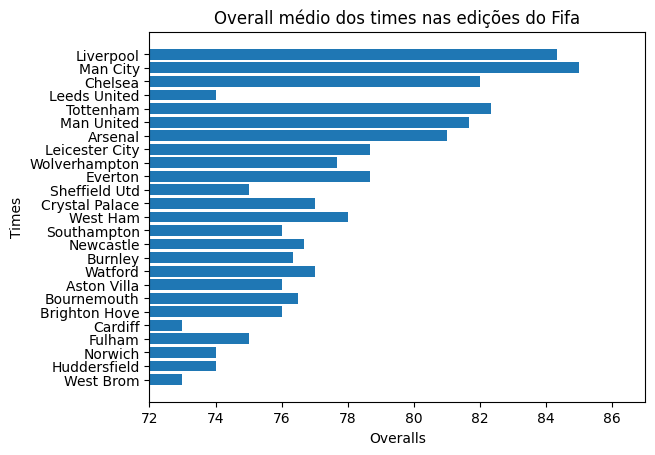

In [256]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(dataTeams['shortName'], dataTeams['overall'], align='center')
ax.set_yticks(dataTeams['shortName'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Overall médio dos times nas edições do Fifa')
plt.xlabel('Overalls')
plt.ylabel('Times')
plt.xlim(72,87)

#dfOverGraf = pd.DataFrame({'Times':dataTeams['shortName'], 'Overall':dataTeams['overall']})
#dfOverGraf.plot.bar(x='Overall', y='Times')

*   Aqui fizemos um gráfico de barras que representa a média de pontos por jogo de cada equipe, que varia de 0 a 3 pontos. Podemos observar o destaque entre Liverpool e Manchester City, com 2.56 e 2.31, respectivamente. A 3ª maior média é a do Chelsea, com 1.81 pontos por jogo.




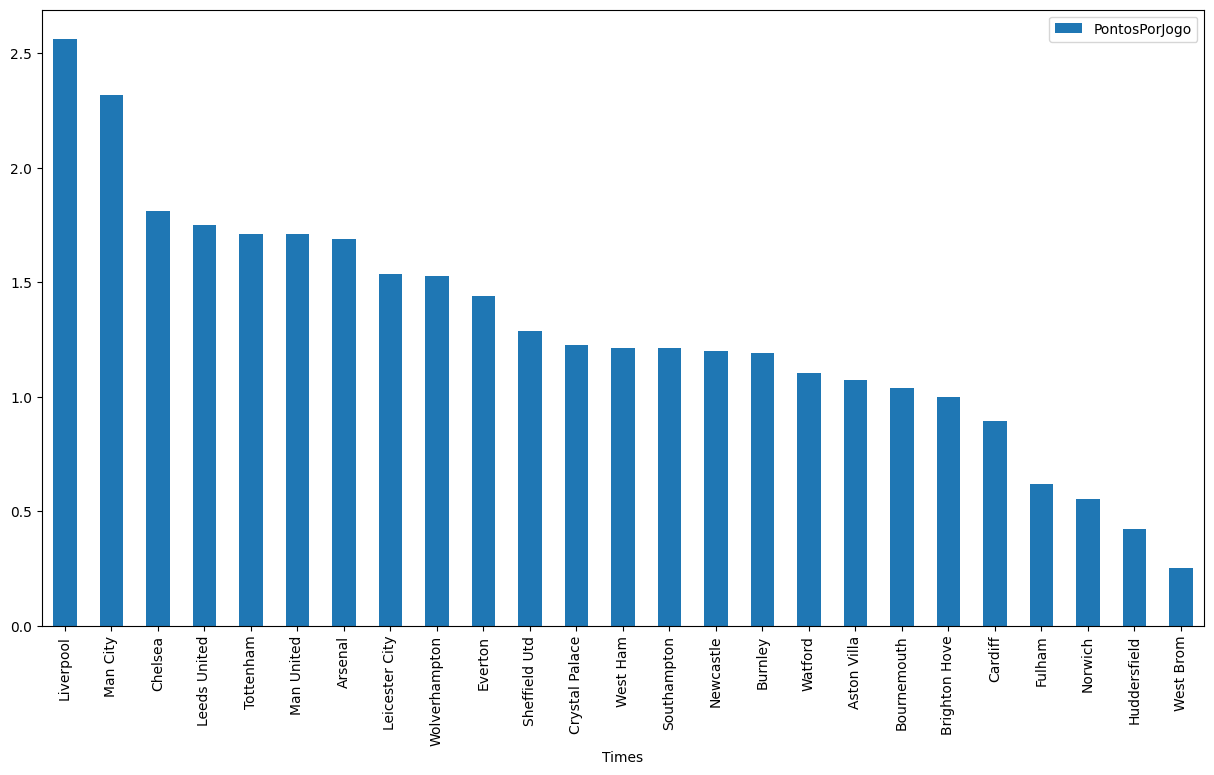

In [257]:
dfVitoriasPorTime = pd.DataFrame({'Times':dataTeams['shortName'], 'PontosPorJogo':dataTeams['pointsPerGame']})
dfVitoriasPorTime.plot.bar(x='Times', y='PontosPorJogo', figsize=(15,8))



*   Agora temos o gráfico de barra do número de vitórias dos times. O Manchester City tem 59 vitórias, enquanto o do Liverpool já conta com 65. O terceiro time com mais vitórias, o  Chelsea, tem apenas 43.



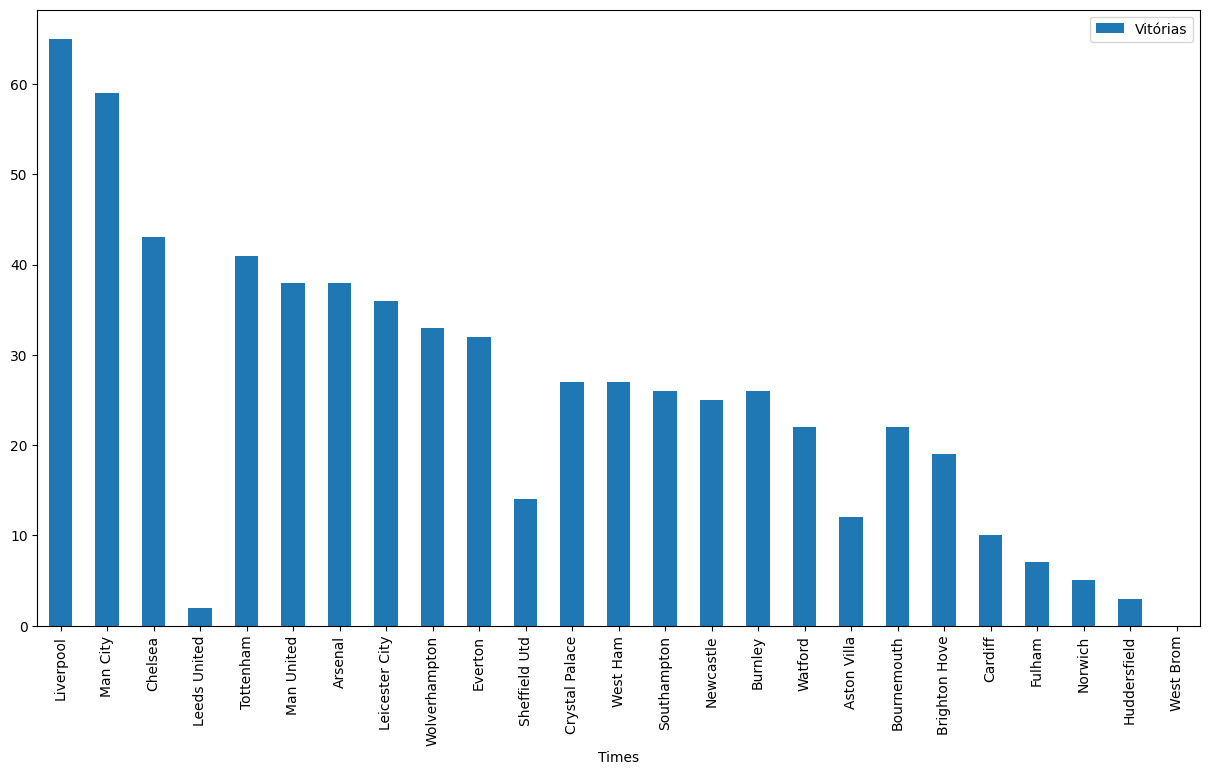

In [258]:
#Grafico das vitórias por time
dfVitoriasPorTime = pd.DataFrame({'Times':dataTeams['shortName'], 'Vitórias':dataTeams['totalWins']})
dfVitoriasPorTime.plot.bar(x='Times', y='Vitórias', figsize=(15,8))



*   O número de vitórias destes dois times é impactante, e abaixo observamos que somados detém cerca de 20% do número de vitórias de toda a liga



Text(0.5, 1.0, 'Vitórias na Premier League desde 18/19')

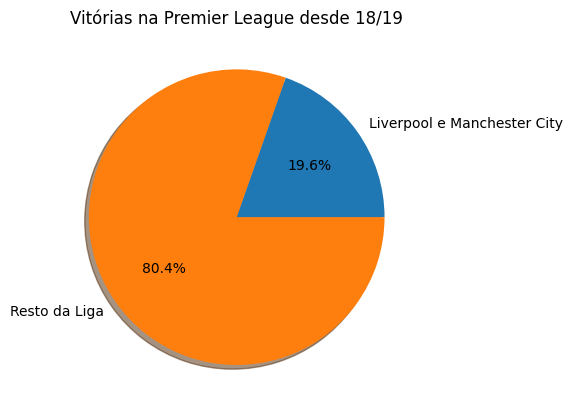

In [259]:
#Grafico pizza de vitorias de Liverpool + City contra o resto da PL
dfLiv = dataTeams[dataTeams['shortName'] == 'Liverpool']
dfCity = dataTeams[dataTeams['shortName'] == 'Man City']
dfTop2 = pd.concat([dfLiv, dfCity])
dfRestOfPL = dataTeams.drop([4,5])

top2GoalsScored = dfTop2['totalWins'].sum()
restOfPLGoalsScored = dfRestOfPL['totalWins'].sum()
plt.pie([top2GoalsScored, restOfPLGoalsScored], labels=['Liverpool e Manchester City', 'Resto da Liga'], autopct='%1.1f%%', shadow=True)
plt.title('Vitórias na Premier League desde 18/19')



*   Manchester City e Liverpool possuem o primeiro e segundo melhor ataque, respectivamente, das ultimas três temporadas somadas. Eles estão separados por 18 gols. Os outros times da liga não passaram de 150 gols. 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


+----+-------------+--------------+
|    | shortName   |   totalGoals |
|----+-------------+--------------|
|  4 | Liverpool   |          185 |
|  5 | Man City    |          203 |
+----+-------------+--------------+


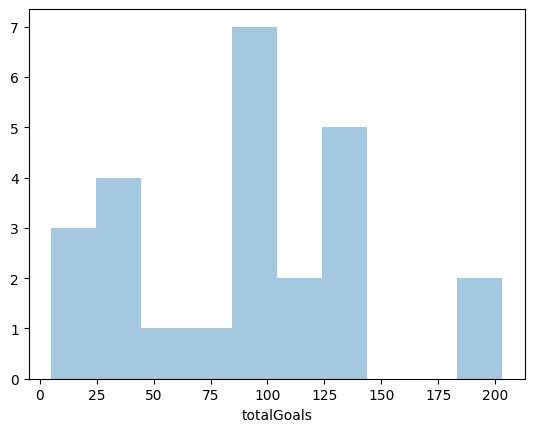

In [260]:
#Distribuição de times por gols feitos num histograma (apenas dois times com mais de 175 gols)
sns.distplot(dataTeams['totalGoals'], bins=10, kde=False)
over175 = dataTeams.loc[dataTeams['totalGoals']>175, ['shortName','totalGoals']]
print(tabulate(over175, headers='keys', tablefmt='psql'))



*   Agora temos o histograma de gols concedidos na Premier League. Liverpool e Manchester City levaram 66 e 65 gols, respectivamente. Abaixo temos a tabela dos times que tomaram menos que 80 gols, dentre eles apenas os times em análise jogaram as tres temporadas da liga.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


+----+---------------+--------------+----------------------+
|    | shortName     |   totalGames |   totalGoalsConceded |
|----+---------------+--------------+----------------------|
|  4 | Liverpool     |           80 |                   66 |
|  5 | Man City      |           79 |                   65 |
| 22 | Sheffield Utd |           42 |                   45 |
| 20 | Aston Villa   |           41 |                   69 |
| 18 | Cardiff       |           38 |                   69 |
| 21 | Norwich       |           38 |                   75 |
| 15 | Huddersfield  |           38 |                   76 |
| 24 | Leeds United  |            4 |                    8 |
| 23 | West Brom     |            4 |                   13 |
+----+---------------+--------------+----------------------+


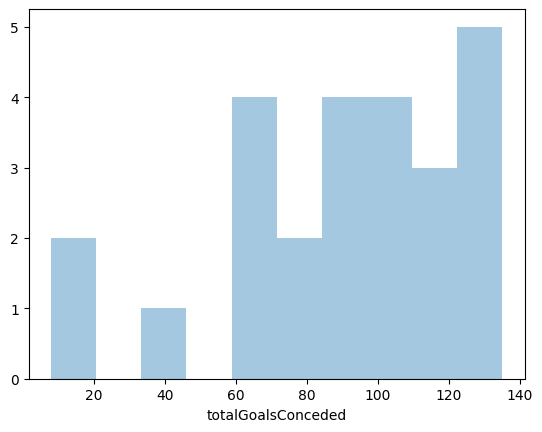

In [261]:
sns.distplot(dataTeams['totalGoalsConceded'], bins=10, kde=False)
under80 = dataTeams.loc[dataTeams['totalGoalsConceded']<80, ['shortName','totalGames','totalGoalsConceded']].sort_values(by=['totalGames'], ascending=False)
print(tabulate(under80, headers='keys', tablefmt='psql'))


*   Nas temporadas em análise, houve 4 confrontos diretos entre City e Liverpool, com 2 vitórias para o Liverpool, 1 empate e 1 vitória para o City. Os outros dois confrontos desta temporada ainda vão acontecer



+-----+--------------------+---------------------------+---------------------------+--------------------+-------+
|     | homeTeam.name      |   score.fullTime.homeTeam |   score.fullTime.awayTeam | awayTeam.name      |   ano |
|-----+--------------------+---------------------------+---------------------------+--------------------+-------|
| 311 | Liverpool FC       |                         0 |                         0 | Manchester City FC |    19 |
| 243 | Manchester City FC |                         2 |                         1 | Liverpool FC       |    19 |
| 475 | Liverpool FC       |                         3 |                         1 | Manchester City FC |    20 |
| 756 | Manchester City FC |                         4 |                         0 | Liverpool FC       |    20 |
+-----+--------------------+---------------------------+---------------------------+--------------------+-------+


([<matplotlib.patches.Wedge at 0x7fd34e4b4438>,
 [Text(0.7778174593052024, 0.7778174593052023, 'Empate'),
  Text(-1.1, 1.3471114790620887e-16, 'Liverpool'),
  Text(0.7778174593052022, -0.7778174593052025, 'Manchester City')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

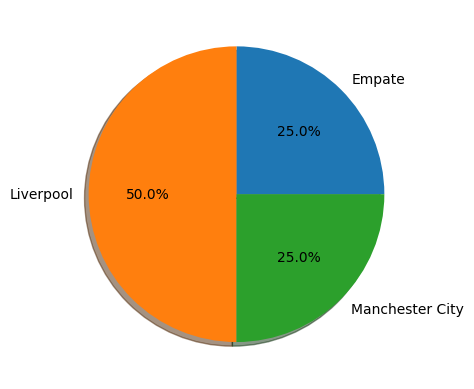

In [262]:
#Liverpool x Manchester City
dfLivXCity = dataMatches.loc[(dataMatches['homeTeam.id']==64) & (dataMatches['awayTeam.id']==65) & (dataMatches['status']=='FINISHED'), ['homeTeam.name', 'score.fullTime.homeTeam', 'score.fullTime.awayTeam', 'awayTeam.name', 'ano']]
dfCityXLiv = dataMatches.loc[(dataMatches['homeTeam.id']==65) & (dataMatches['awayTeam.id']==64) & (dataMatches['status']=='FINISHED'), ['homeTeam.name', 'score.fullTime.homeTeam', 'score.fullTime.awayTeam', 'awayTeam.name', 'ano']]
dfClassico = pd.concat([dfLivXCity, dfCityXLiv]).sort_values(by=['ano'])
print(tabulate(dfClassico, headers='keys', tablefmt='psql'))
plt.pie([1,2,1], labels=['Empate', 'Liverpool', 'Manchester City'], autopct='%1.1f%%', shadow=True)



*   Neste gráfico de setores podemos observar o desempenho do Liverpool contra o restante do Big 6. 



+-----+--------+----------------------+----------+------------+----------------+----------------+----------------------+-------------+--------------------+------------------+--------------------------+----------------+------------------+---------------------------+---------------------------+---------------------------+---------------------------+---------------+----------------------+---------------+----------------------+-------+--------------+-------------------+-------------------+--------------------+-----------+
|     |     id | utcDate              | status   |   matchday | stage          | group          | lastUpdated          |   season.id | season.startDate   | season.endDate   |   season.currentMatchday | score.winner   | score.duration   |   score.fullTime.homeTeam |   score.fullTime.awayTeam |   score.halfTime.homeTeam |   score.halfTime.awayTeam |   homeTeam.id | homeTeam.name        |   awayTeam.id | awayTeam.name        |   ano |   totalGoals |   homeTeamOverall |   awa

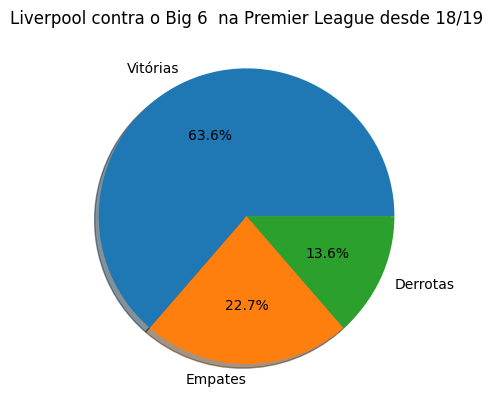

In [263]:
#Desempenho do Liverpool contra o Big 6
#liv=64 city=65 che=61 tot=73 untd=66 ars=57
livGames = dataMatches.loc[((dataMatches['homeTeam.id']==64) | (dataMatches['awayTeam.id']==64)) & (dataMatches['status']=='FINISHED')]
livGamesAway = livGames.loc[(livGames['homeTeam.id']==65) | (livGames['homeTeam.id']==61) |  (livGames['homeTeam.id']==73) | (livGames['homeTeam.id']==66)| (livGames['homeTeam.id']==57)]
livGamesHome = livGames.loc[(livGames['awayTeam.id']==65) | (livGames['awayTeam.id']==61) |  (livGames['awayTeam.id']==73) | (livGames['awayTeam.id']==66)| (livGames['awayTeam.id']==57)]
livGamesB6 = pd.concat([livGamesAway,livGamesHome])
livWinsB6 = livGamesB6.loc[((livGamesB6['homeTeam.id']==64) & (livGamesB6['score.winner']=='HOME_TEAM')) | ((livGamesB6['awayTeam.id']==64) & (livGamesB6['score.winner']=='AWAY_TEAM'))].count()
livDrawsB6 = livGamesB6.loc[livGamesB6['score.winner']=='DRAW'].count()
livDefeatsB6 = livGamesB6.count()-livWinsB6-livDrawsB6
plt.pie([livWinsB6['id'], livDrawsB6['id'], livDefeatsB6['id']], labels=['Vitórias', 'Empates', 'Derrotas'], autopct='%1.1f%%', shadow=True)
plt.title('Liverpool contra o Big 6  na Premier League desde 18/19')
print(tabulate(livGamesB6 , headers='keys', tablefmt='psql'))

* Abaixo temos o gráfico de setores do Manchester City contra o Big 6. A percentagem de vitórias é parecida com a do Liverpool, porém há uma quantidade considerável de derrotas, 30%, enquanto a do liverpool é 13.6%.

Text(0.5, 1.0, 'Manchester City contra o Big 6 na Premier League desde 18/19')

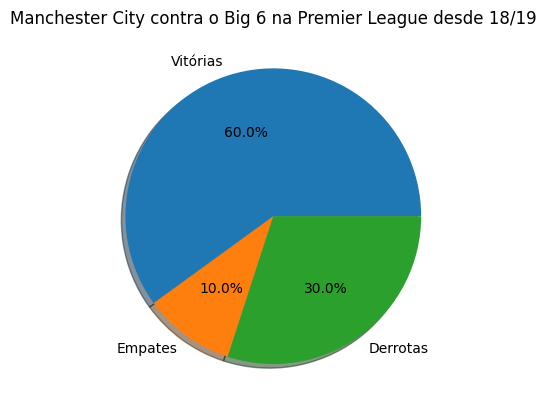

In [264]:
#Desempenho do Manchester City contra o Big 6
cityGames = dataMatches.loc[((dataMatches['homeTeam.id']==65) | (dataMatches['awayTeam.id']==65)) & (dataMatches['status']=='FINISHED')]
cityGamesAway = cityGames.loc[(cityGames['homeTeam.id']==64) | (cityGames['homeTeam.id']==61) |  (cityGames['homeTeam.id']==73) | (cityGames['homeTeam.id']==66)| (cityGames['homeTeam.id']==57)]
cityGamesHome = cityGames.loc[(cityGames['awayTeam.id']==64) | (cityGames['awayTeam.id']==61) |  (cityGames['awayTeam.id']==73) | (cityGames['awayTeam.id']==66)| (cityGames['awayTeam.id']==57)]
cityGamesB6 = pd.concat([cityGamesAway,cityGamesHome])
cityWinsB6 = cityGamesB6.loc[((cityGamesB6['homeTeam.id']==65) & (cityGamesB6['score.winner']=='HOME_TEAM')) | ((cityGamesB6['awayTeam.id']==65) & (cityGamesB6['score.winner']=='AWAY_TEAM'))].count()
cityDrawsB6 = cityGamesB6.loc[cityGamesB6['score.winner']=='DRAW'].count()
cityDefeatsB6 = cityGamesB6.count()-cityWinsB6-cityDrawsB6
plt.pie([cityWinsB6['id'], cityDrawsB6['id'], cityDefeatsB6['id']], labels=['Vitórias', 'Empates', 'Derrotas'], autopct='%1.1f%%', shadow=True)
plt.title('Manchester City contra o Big 6 na Premier League desde 18/19')
#print(tabulate(livGamesB6 , headers='keys', tablefmt='psql'))



*   Abaixo adicionamos ao dataframe das partidas os gols que aconteceram no segundo tempo. Depois, criamos 4 dataframes para o Liverpool e City, com dados dentro e fora de casa separados. Ainda na célula, foram feitas as covariancias entre os atributos



In [265]:

dataMatches['score.secondTime.homeTeam'] = dataMatches['score.fullTime.homeTeam']-dataMatches['score.halfTime.homeTeam']
dataMatches['score.secondTime.awayTeam'] = dataMatches['score.fullTime.awayTeam']-dataMatches['score.halfTime.awayTeam']
#Gerando a pontuação de cada time por jogo no dataframe de partidas
dataMatches.loc[dataMatches['score.winner'] == 'AWAY_TEAM','points.awayTeam.Gained'] = 3
dataMatches.loc[dataMatches['score.winner'] == 'DRAW','points.awayTeam.Gained'] = 1
dataMatches.loc[dataMatches['score.winner'] == 'HOME_TEAM','points.awayTeam.Gained'] = 0
dataMatches.loc[dataMatches['score.winner'] == 'AWAY_TEAM','points.homeTeam.Gained'] = 0
dataMatches.loc[dataMatches['score.winner'] == 'DRAW','points.homeTeam.Gained'] = 1
dataMatches.loc[dataMatches['score.winner'] == 'HOME_TEAM','points.homeTeam.Gained'] = 3
lvpHome = dataMatches.loc[dataMatches['homeTeam.id']==64]
lvpAway = dataMatches.loc[dataMatches['awayTeam.id']==64]
cityHome = dataMatches.loc[dataMatches['homeTeam.id']==65]
cityAway = dataMatches.loc[dataMatches['awayTeam.id']==65]
#lvpHome.cov()
#lvpAway.cov()
#cityHome.cov()
#cityAway.cov()



*   Nas 4 proximas células foram feitas scarplotts com densidades (os mais escuros são os que ocorrem numa maior frequência), sendo o eixo X gols no primeiro tempo e o Eixo Y gols no segundo tempo. Os dois primeiros são do Liverpool, em vermelho. Já os dois últimos são do City, em azul. 
* Podemos observar que a distribuição de bolinhas nos gráficos do Manchester City são mais amplas, o que indica que teve jogos em que marcou uma quantidade de gols enorme, ao contrário do Liverpool, que principalmente fora de casa não tem costume de marcar tantos gols.



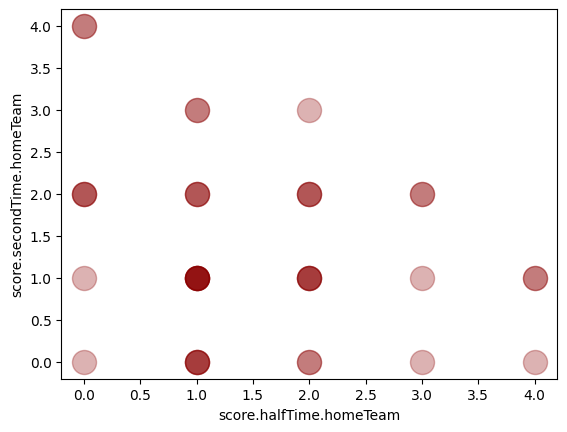

In [266]:
sns.regplot(x=lvpHome['score.halfTime.homeTeam'], y=lvpHome['score.secondTime.homeTeam'], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":300})

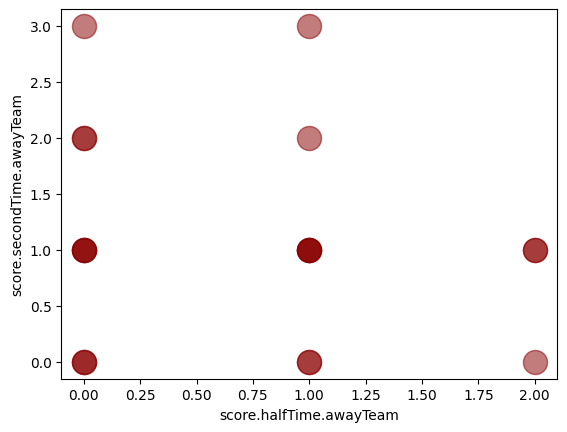

In [267]:
sns.regplot(x=lvpAway['score.halfTime.awayTeam'], y=lvpAway['score.secondTime.awayTeam'], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":300})

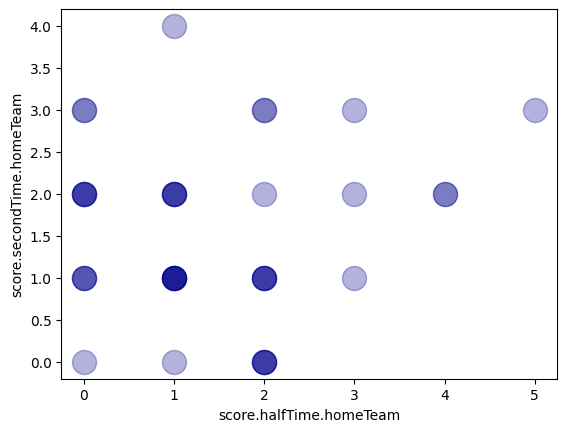

In [268]:
sns.regplot(x=cityHome['score.halfTime.homeTeam'], y=cityHome['score.secondTime.homeTeam'], fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":300})

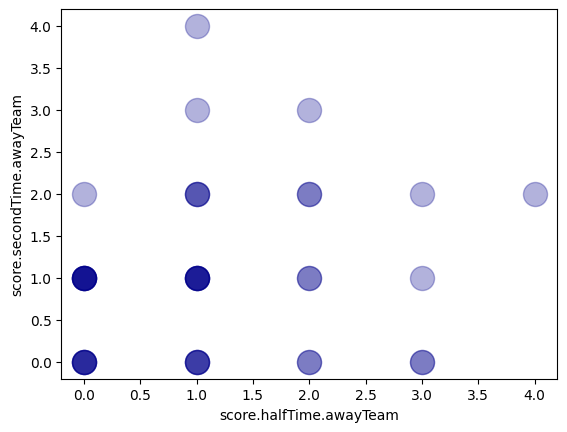

In [269]:
sns.regplot(x=cityAway['score.halfTime.awayTeam'], y=cityAway['score.secondTime.awayTeam'], fit_reg=False, scatter_kws={"color":"darkblue","alpha":0.3,"s":300})



*   Com a covariância feita, faremos agora a correlação entre os atributos. Vamos destacar a correlação entre "totalGoals", "score.fullTime.homeTeam" e "score.fullTime.awayTeam". O método usado foi o de Pearson, pois são duas variáveis dependentes e quantitativas.
* Podemos observar, nos jogos do Manchester city, que a correlação entre os gols feitos pelo city e o total de gols na partida é forte. Já correlação entre os gols dos adversários e o total de gols na partida é fraca. Podemos inferir, então, que os placares nos jogos do city tendem a ser elásticos, com grande influencia de seus gols no placar do jogo e baixa influencia dos gols do adversário
* Já nos jogos do Liverpool, apesar do ótimo desempenho do time, observamos que a correlação entre os gols do adversário no placar também é alta, influenciando assim no placar da partida.Isso indica, então, que os placares são menos elásticos. Apesar do ótimo restrospecto, o Liverpool não aplica tantas goleadas em seus jogos.



In [270]:
cityHome.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.067178,0.978330,-0.489496,-0.047043,0.348730,-0.046783,0.081935,NaN,-0.039286,0.997954,0.167850,NaN,0.019499,0.167850,NaN,-0.020626,0.401017,0.350244,-0.370580
matchday,-0.067178,1.000000,-0.024611,0.233194,-0.097621,-0.371005,-0.059059,-0.354198,NaN,0.111842,-0.058494,-0.327293,NaN,0.124454,-0.327293,NaN,-0.089390,-0.225111,-0.262697,0.276680
season.id,0.978330,-0.024611,1.000000,-0.298431,-0.028219,0.224152,-0.037129,0.051149,NaN,-0.054508,0.989537,0.109921,NaN,0.007474,0.109921,NaN,-0.001264,0.258905,0.273863,-0.305103
season.currentMatchday,-0.489496,0.233194,-0.298431,1.000000,0.094558,-0.670001,0.057206,-0.171394,NaN,-0.044874,-0.433013,-0.318277,NaN,-0.054422,-0.318277,NaN,0.086585,-0.759912,-0.465935,0.428798
score.fullTime.homeTeam,-0.047043,-0.097621,-0.028219,0.094558,1.000000,-0.317921,0.799613,-0.147885,NaN,-0.040774,-0.040945,0.810921,NaN,-0.162446,0.810921,NaN,0.677205,-0.310355,-0.377699,0.384988
score.fullTime.awayTeam,0.348730,-0.371005,0.224152,-0.670001,-0.317921,1.000000,-0.224310,0.664471,NaN,0.012496,0.312977,0.296987,NaN,0.145707,0.296987,NaN,-0.251938,0.825788,0.795734,-0.809703
score.halfTime.homeTeam,-0.046783,-0.059059,-0.037129,0.057206,0.799613,-0.224310,1.000000,-0.054791,NaN,-0.000184,-0.043713,0.666879,NaN,0.044951,0.666879,NaN,0.099646,-0.256366,-0.273026,0.274698
score.halfTime.awayTeam,0.081935,-0.354198,0.051149,-0.171394,-0.147885,0.664471,-0.054791,1.000000,NaN,0.038683,0.074216,0.261156,NaN,0.065860,0.261156,NaN,-0.177904,0.127242,0.556100,-0.577213
homeTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awayTeam.id,-0.039286,0.111842,-0.054508,-0.044874,-0.040774,0.012496,-0.000184,0.038683,NaN,1.000000,-0.044696,-0.033353,NaN,-0.454124,-0.033353,NaN,-0.067335,-0.012609,-0.091569,0.097326


In [271]:
cityAway.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.227820,0.968042,-0.617139,0.250902,0.074890,0.124354,0.049786,-0.086726,NaN,0.997230,0.229365,-0.103121,NaN,0.229365,NaN,0.237875,0.065179,-0.157855,0.135346
matchday,-0.227820,1.000000,-0.169454,0.320307,-0.095535,-0.067105,-0.079022,-0.134433,-0.003712,NaN,-0.215847,-0.125898,-0.058603,NaN,-0.125898,NaN,-0.064926,0.038791,0.035206,0.043708
season.id,0.968042,-0.169454,1.000000,-0.400152,0.283182,0.095956,0.190307,0.032684,-0.084898,NaN,0.983988,0.270298,-0.070052,NaN,0.270298,NaN,0.228026,0.117172,-0.181291,0.177498
season.currentMatchday,-0.617139,0.320307,-0.400152,1.000000,-0.030072,0.025946,0.140309,-0.081680,0.050419,NaN,-0.557086,0.007408,0.154511,NaN,0.007408,NaN,-0.154207,0.129627,0.008677,0.062941
score.fullTime.homeTeam,0.250902,-0.095535,0.283182,-0.030072,1.000000,-0.307079,0.675701,-0.233346,-0.352875,NaN,0.262458,0.308995,0.152488,NaN,0.308995,NaN,0.802253,-0.235661,-0.808142,0.827130
score.fullTime.awayTeam,0.074890,-0.067105,0.095956,0.025946,-0.307079,1.000000,-0.210327,0.784220,0.303850,NaN,0.081906,0.810226,-0.449242,NaN,0.810226,NaN,-0.244061,0.741098,0.619034,-0.581928
score.halfTime.homeTeam,0.124354,-0.079022,0.190307,0.140309,0.675701,-0.210327,1.000000,-0.155534,-0.113318,NaN,0.145162,0.205958,0.138321,NaN,0.205958,NaN,0.102001,-0.166053,-0.518830,0.551315
score.halfTime.awayTeam,0.049786,-0.134433,0.032684,-0.081680,-0.233346,0.784220,-0.155534,1.000000,0.184328,NaN,0.045503,0.639997,-0.420408,NaN,0.639997,NaN,-0.188934,0.164594,0.480304,-0.451182
homeTeam.id,-0.086726,-0.003712,-0.084898,0.050419,-0.352875,0.303850,-0.113318,0.184328,1.000000,NaN,-0.086737,0.086325,-0.453507,NaN,0.086325,NaN,-0.384420,0.283567,0.398298,-0.373129
awayTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
lvpHome.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.230626,0.968070,-0.617053,0.024548,0.336373,0.180346,0.345607,NaN,-0.091187,0.997238,0.179648,0.902590,-0.046190,0.179648,NaN,-0.159505,0.170607,-0.116542,0.116542
matchday,-0.230626,1.000000,-0.166679,0.338936,0.064746,-0.032875,-0.148684,-0.093763,NaN,0.106971,-0.216956,0.030374,-0.107030,0.007671,0.030374,NaN,0.236696,0.043312,0.089236,-0.089236
season.id,0.968070,-0.166679,1.000000,-0.400152,-0.008254,0.288243,0.145184,0.259903,NaN,-0.088105,0.983988,0.133034,0.981683,-0.040342,0.133034,NaN,-0.163084,0.182448,-0.115385,0.115385
season.currentMatchday,-0.617053,0.338936,-0.400152,1.000000,-0.113456,-0.323153,-0.205196,-0.446333,NaN,0.058649,-0.557086,-0.236743,-0.218218,0.042065,-0.236743,NaN,0.075619,-0.049593,0.065326,-0.065326
score.fullTime.homeTeam,0.024548,0.064746,-0.008254,-0.113456,1.000000,0.375097,0.629474,0.337161,NaN,0.075869,0.014586,0.894641,-0.032376,-0.220039,0.894641,NaN,0.575013,0.238480,-0.473011,0.473011
score.fullTime.awayTeam,0.336373,-0.032875,0.288243,-0.323153,0.375097,1.000000,0.302372,0.767323,NaN,0.002526,0.324043,0.749740,0.239760,0.042264,0.749740,NaN,0.145921,0.767323,-0.026739,0.026739
score.halfTime.homeTeam,0.180346,-0.148684,0.145184,-0.205196,0.629474,0.302372,1.000000,0.367360,NaN,0.073249,0.171467,0.595088,0.111943,-0.193819,0.595088,NaN,-0.273760,0.096674,-0.212238,0.212238
score.halfTime.awayTeam,0.345607,-0.093763,0.259903,-0.446333,0.337161,0.767323,0.367360,1.000000,NaN,-0.022958,0.322319,0.610515,0.183974,0.061256,0.610515,NaN,0.030537,0.177570,-0.020518,0.020518
homeTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awayTeam.id,-0.091187,0.106971,-0.088105,0.058649,0.075869,0.002526,0.073249,-0.022958,NaN,1.000000,-0.091244,0.055377,-0.081628,-0.464907,0.055377,NaN,0.016786,0.026835,-0.022109,0.022109


In [273]:
lvpAway.corr(method='pearson')

,id,matchday,season.id,season.currentMatchday,score.fullTime.homeTeam,score.fullTime.awayTeam,score.halfTime.homeTeam,score.halfTime.awayTeam,homeTeam.id,awayTeam.id,ano,totalGoals,homeTeamOverall,awayTeamOverall,totalGoalsMinMax,outlier,score.secondTime.homeTeam,score.secondTime.awayTeam,points.awayTeam.Gained,points.homeTeam.Gained
id,1.000000,-0.162848,0.968111,-0.616928,0.356535,0.010387,0.348792,0.044760,-0.165877,NaN,0.997250,0.306293,0.020705,0.902659,0.306293,NaN,0.228052,-0.023146,-0.097629,0.196815
matchday,-0.162848,1.000000,-0.095142,0.315924,0.048920,-0.126052,0.168126,-0.045646,-0.049696,NaN,-0.147656,-0.043993,-0.109238,-0.035636,-0.043993,NaN,-0.109238,-0.111649,-0.197990,0.207487
season.id,0.968111,-0.095142,1.000000,-0.400152,0.270046,-0.002689,0.273332,0.073037,-0.135717,NaN,0.983988,0.224868,0.003295,0.981683,0.224868,NaN,0.162039,-0.060772,-0.062414,0.157928
season.currentMatchday,-0.616928,0.315924,-0.400152,1.000000,-0.452191,-0.048680,-0.411291,0.064249,0.178663,NaN,-0.557086,-0.412428,-0.067442,-0.218218,-0.412428,NaN,-0.325552,-0.107714,0.155976,-0.218218
score.fullTime.homeTeam,0.356535,0.048920,0.270046,-0.452191,1.000000,-0.141201,0.850534,0.021231,-0.292552,NaN,0.332649,0.744144,0.168737,0.193557,0.744144,NaN,0.788904,-0.182156,-0.596888,0.724890
score.fullTime.awayTeam,0.010387,-0.126052,-0.002689,-0.048680,-0.141201,1.000000,-0.107715,0.538130,0.432017,NaN,0.007031,0.556253,-0.363378,-0.012983,0.556253,NaN,-0.125860,0.746873,0.651003,-0.544125
score.halfTime.homeTeam,0.348792,0.168126,0.273332,-0.411291,0.850534,-0.107715,1.000000,0.016196,-0.273209,NaN,0.327673,0.641274,0.201582,0.205559,0.641274,NaN,0.347802,-0.138958,-0.582170,0.668790
score.halfTime.awayTeam,0.044760,-0.045646,0.073037,0.064249,0.021231,0.538130,0.016196,1.000000,0.246198,NaN,0.053689,0.380941,-0.217583,0.091132,0.380941,NaN,0.018924,-0.158561,0.377740,-0.294427
homeTeam.id,-0.165877,-0.049696,-0.135717,0.178663,-0.292552,0.432017,-0.273209,0.246198,1.000000,NaN,-0.157729,0.045941,-0.446689,-0.107378,0.045941,NaN,-0.202305,0.311839,0.328447,-0.290000
awayTeam.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Teste de Hipótese

  Iremos testar algumas das afirmações que fizemos com relação ao desempenho do Manchester City e o do Liverpool na parte de análise descritiva

* Testaremos primeiro se o Manchester City e o Liverpool tem o mesmo desempenho dentro e fora de casa
* Depois, testaremos a hipótese que quantidade de Gols dentro de casa dos dois times é maior do que a quantidade de gols fora de casa
* Além disso, testaremos a hipótese de que a defesa do Manchester City é mais imprevisível que a do Liverpool, ou seja, toma uma quantidade de gols mais constate, visto que um dos zagueiros do Liverpool já foi eleito o melhor jogador do mundo e a defesa do Manchester City é vista como o ponto fraco do time.


In [274]:
from scipy import stats

In [275]:
#vericando se a pontuação do Manchester City dentro e fora de casa seguem uma gaussiana
homePoints = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 65)][['points.homeTeam.Gained']])
awayPoints = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 65)][['points.awayTeam.Gained']])
print(homePoints, awayPoints)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.44634103775024414, 5.855268353505139e-11) (0.6420432329177856, 1.2302817431475432e-08)


In [276]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityDentroDeCasa == MancityForaDeCasa, H1 : MancityDentroDeCasa != MancityForaDeCasa, teste bilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 65)][['points.homeTeam.Gained']], dataMatches[(dataMatches['awayTeam.id'] == 65)][['points.awayTeam.Gained']])

MannwhitneyuResult(statistic=625.0, pvalue=0.023101433368823955)

In [277]:
#Vericando se a pontuação do Liverpool dentro e fora de casa seguem uma gaussiana
homePoints = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 64)][['points.homeTeam.Gained']])
awayPoints = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 64)][['points.awayTeam.Gained']])
print(homePoints, awayPoints)

(0.29247617721557617, 1.1923076458433823e-12) (0.6264241933822632, 7.312018546201671e-09)


In [278]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : LiverpoolDentroDeCasa == LiverpoolForaDeCasa, H1 : LiverpoolDentroDeCasa != LiverpoolForaDeCasa, teste bilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 64)][['points.homeTeam.Gained']], dataMatches[(dataMatches['awayTeam.id'] == 64)][['points.awayTeam.Gained']])

MannwhitneyuResult(statistic=612.5, pvalue=0.004039219324159384)

Baseado nos testes, verificamos que:

*   A hipótese nula foi rejeitada nos dois casos, logo o desempenho do Manchester City e do Liverpool dentro e fora de casa são diferentes, visto que os P-values são abaixo de 0.025






Testando a hipótese que quantidade de Gols dentro de casa dos dois times é maior do que a quantidade de gols fora de casa:

In [279]:
#Vericando se a quantidade de gols do Manchester City dentro e fora de casa seguem uma gaussiana
homeGoals = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 65)][['score.fullTime.homeTeam']])
awayGoals = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 65)][['score.fullTime.awayTeam']])
print(homeGoals, awayGoals)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.8920178413391113, 0.0013130528386682272) (0.9254912734031677, 0.01150900311768055)


In [280]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGolsDentroDeCasa <= MancityGolsForaDeCasa, H1 : MancityGolsDentroDeCasa > MancityGolsForaDeCasa, teste unilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 65)][['score.fullTime.homeTeam']], dataMatches[(dataMatches['awayTeam.id'] == 65)][['score.fullTime.awayTeam']])

MannwhitneyuResult(statistic=567.0, pvalue=0.01658270744324201)

In [281]:
#Vericando se a quantidade de gols do Liverpool dentro e fora de casa seguem uma gaussiana
homeGoals = stats.shapiro(dataMatches[(dataMatches['homeTeam.id'] == 64)][['score.fullTime.homeTeam']])
awayGoals = stats.shapiro(dataMatches[(dataMatches['awayTeam.id'] == 64)][['score.fullTime.awayTeam']])
print(homeGoals, awayGoals)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.9284207820892334, 0.014308503828942776) (0.9168757200241089, 0.006150249857455492)


In [282]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGolsDentroDeCasa <= MancityGolsForaDeCasa, H1 : MancityGolsDentroDeCasa > MancityGolsForaDeCasa, teste unilateral)
stats.mannwhitneyu(dataMatches[(dataMatches['homeTeam.id'] == 64)][['score.fullTime.homeTeam']], dataMatches[(dataMatches['awayTeam.id'] == 64)][['score.fullTime.awayTeam']])

MannwhitneyuResult(statistic=446.0, pvalue=0.00023590662212623567)

Baseado nos testes, verificamos que:

* A hipótese nula foi rejeitada nos dois casos, logo a quantidade de gols do Manchester City e do Liverpool dentro e fora de casa são diferentes, visto que os P-values são abaixo de 0.05

Testando a hipótese que a defesa do Manchester City é mais imprevisível, ou seja, a quantidade de gols que toma por jogo varia mais do que a do Liverpool ou não




In [283]:
#Criando a distribuição de gols do ManCity
manCityHomeGoalsConceded = cityHome['score.fullTime.awayTeam']
manCityAwayGoalsConceded = cityAway['score.fullTime.homeTeam']
manCityGoalsConceded = pd.concat([manCityHomeGoalsConceded,manCityAwayGoalsConceded])
manCityGoalsConceded = manCityGoalsConceded.to_frame(name='totalGoalsConceded')

In [284]:
#Criando a distribuição de gols do Liverpool
lvpHomeGoalsConceded = lvpHome['score.fullTime.awayTeam']
lvpAwayGoalsConceded = lvpAway['score.fullTime.homeTeam']
lvpGoalsConceded = pd.concat([lvpHomeGoalsConceded,lvpAwayGoalsConceded])
lvpGoalsConceded = lvpGoalsConceded.to_frame(name='totalGoalsConceded')

In [285]:
#Vericando se a frequencia de gols concedidos do Manchester City e do Liverpool seguem uma gaussiana
lvpGoalsConcededTest = stats.shapiro(lvpGoalsConceded['totalGoalsConceded'])
manCityGoalsConcededTest = stats.shapiro(manCityGoalsConceded['totalGoalsConceded'])
print(lvpGoalsConcededTest,manCityGoalsConcededTest)
#Como o P-value é muito baixo, logo verificamos que a hipótese nula é rejeitada, logo não segue uma gaussiana

(0.6822967529296875, 7.217164799816489e-12) (0.7734200358390808, 1.075283639906388e-09)


In [286]:
#Como não são pareados, usaremos o método Mann-Whitney para comparar os dois grupos (H0 : MancityGols == LiverpoolGolsConcedidos, H1 : MancityGols != LiverpoolGolsConcedidos, teste bilateral)
stats.mannwhitneyu(manCityGoalsConceded, lvpGoalsConceded)

MannwhitneyuResult(statistic=3106.5, pvalue=0.4215914321060687)

Baseado nos testes, verificamos que:

* A hipótese nula não foi rejeitada, visto que o P-Value é 0.42, logo a defesa do Manchester City, mesmo muito criticada, não é mais imprevisível do que a do Liverpool